# IRIS CLASS PREDICTION 

### In this project we predict the Class of a particular flower by knowing its petal' length ,petal's width ,sepal's length and sepal's width

### Importing libraries and dataset

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("iris.csv")
data

,sepal length,sepal width,petal length,petal width,Clas
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
data.columns


Index([' sepal length', 'sepal width', 'petal length', 'petal width', 'Clas'], dtype='object')

In [27]:
data.shape

(150, 5)

In [28]:
data.isnull().sum()


 sepal length    0
sepal width      0
petal length     0
petal width      0
Clas             0
dtype: int64

#### there is no null value in the dataset . hence, our dataset is cleaned

#### value count

In [29]:
data["Clas"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Clas, dtype: int64

In [30]:
data.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


#### converting categorical to numerical using LabelEncoder

In [39]:
data=data.rename(columns={"Clas":"Class"})

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
data["Class"].value_counts()

2    50
1    50
0    50
Name: Class, dtype: int64

In [42]:
le=LabelEncoder()

In [43]:
data["Class"]=le.fit_transform(data["Class"])

In [44]:
data["Class"].unique()

array([0, 1, 2], dtype=int64)

#### Here,  0:Iris-virginica,1:Iris-setosa ,2:Iris-versicolor 

In [47]:
data.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


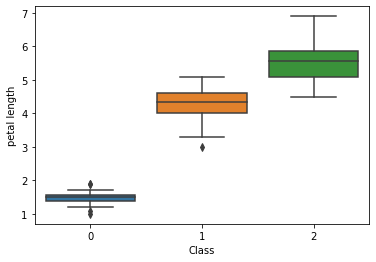

In [48]:
sns.boxplot(x="Class",y="petal length",data=data)

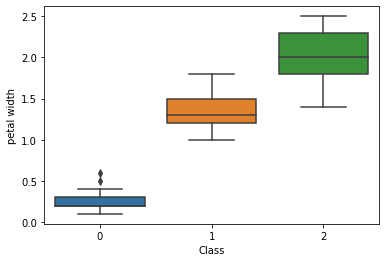

In [49]:
sns.boxplot(x="Class",y="petal width",data=data)

#### petal length and petal width is largest for type 2 i.e Iris-versicolor

### outlier

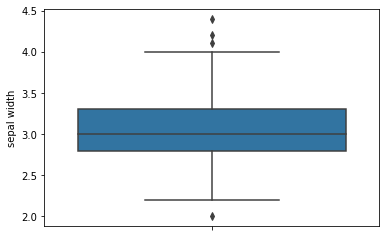

In [50]:
sns.boxplot(y=data['sepal width'])

In [51]:
data.drop(data[data['sepal width'] > 4.0].index, inplace=True)
data.drop(data[data['sepal width'] < 2.25].index, inplace=True)

### Train Test split

In [52]:
X = data.drop('Class',axis=1)
y= data.Class

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=0,stratify=y, test_size= 0.3)

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()   # create LR object
lr.fit(X_train,y_train)     # training

print(' Training Model Accuracy : ', lr.score(X_train,y_train))   # train set 
print(' Test Model Accuracy : ', lr.score(X_valid,y_valid))   # test set 

 Training Model Accuracy :  0.98
 Test Model Accuracy :  0.9767441860465116


### prediction from training model is 98% and tesing model is 97.67%

### Random Forest Classification

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
RF = RandomForestClassifier(n_estimators=40)

RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [58]:
print(' Training Model Accuracy : ', RF.score(X_train,y_train))   # train set 
print(' Test Model Accuracy : ', RF.score(X_valid,y_valid))

 Training Model Accuracy :  1.0
 Test Model Accuracy :  0.9767441860465116


### prediction for training model is 100% and testing model is 97.67%